<a href="https://colab.research.google.com/github/Bpriya2001/DeepLearning/blob/main/pytorch_workflow_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch workflow Exercise

In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [16]:
weights = 0.3
bias = 0.9
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias

In [17]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [18]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test, predictions = None):

  plt.figure(figsize=(10,5))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()
  plt.xlabel("X")
  plt.ylabel("y")
  plt.title("Model predictions")
  plt.show()

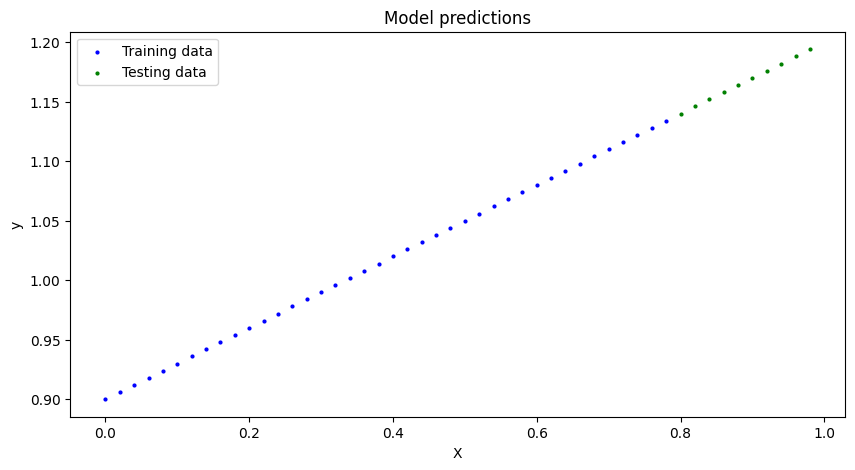

In [19]:
plot_predictions()

In [20]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

torch.manual_seed(42)
model_1 = LinearRegressionModelV1()
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [22]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [23]:
# Loss and Optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)


In [24]:
def training_testing_loop(epochs, model, loss_fn, optimizer, train_data, train_labels, test_data, test_labels):

  X_train = train_data.to(device)
  y_train = train_labels.to(device)
  X_test = test_data.to(device)
  y_test = test_labels.to(device)

  for epoch in range(epochs):

    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if epoch % 20 == 0:

      model.eval()

      with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.7568813562393188 | Test loss: 0.7250651121139526
Epoch: 20 | Loss: 0.5264613628387451 | Test loss: 0.4556453227996826
Epoch: 40 | Loss: 0.2960416078567505 | Test loss: 0.18622562289237976
Epoch: 60 | Loss: 0.07731032371520996 | Test loss: 0.06994309276342392
Epoch: 80 | Loss: 0.0521300844848156 | Test loss: 0.11544597148895264


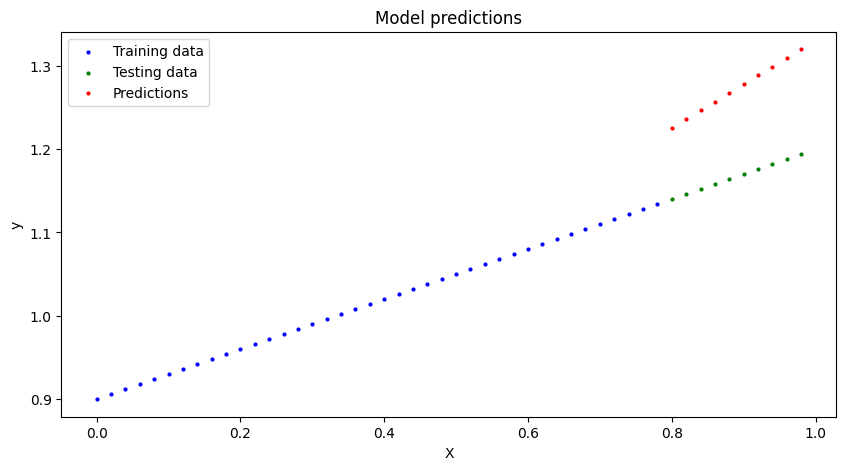

In [25]:
training_testing_loop(epochs=100, model=model_1, loss_fn=loss_fn, optimizer=optimizer, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

Epoch: 0 | Loss: 0.04509609192609787 | Test loss: 0.1043960452079773
Epoch: 20 | Loss: 0.038231261074543 | Test loss: 0.08853815495967865
Epoch: 40 | Loss: 0.03136344999074936 | Test loss: 0.07268030941486359
Epoch: 60 | Loss: 0.02448992058634758 | Test loss: 0.05682243034243584
Epoch: 80 | Loss: 0.01762397214770317 | Test loss: 0.04027769714593887
Epoch: 100 | Loss: 0.010759142227470875 | Test loss: 0.024419832974672318
Epoch: 120 | Loss: 0.003885951591655612 | Test loss: 0.008561968803405762
Epoch: 140 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 160 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 180 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206


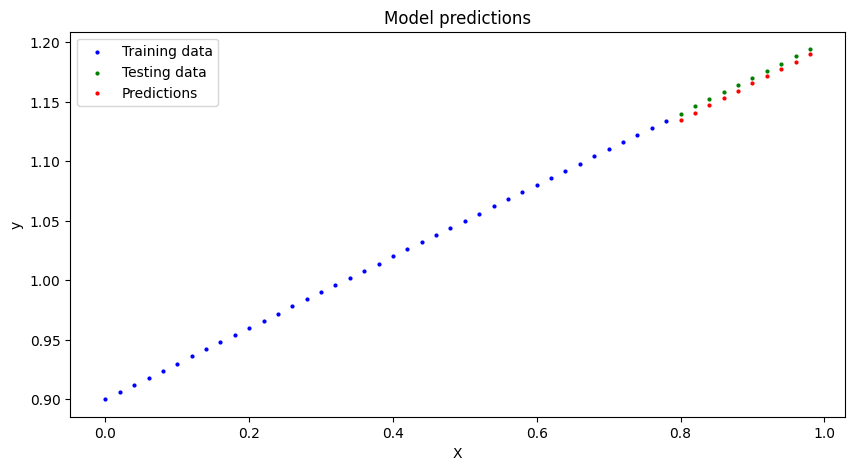

In [26]:
training_testing_loop(epochs=200, model=model_1, loss_fn=loss_fn, optimizer=optimizer, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

Epoch: 0 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 20 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 40 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 60 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 80 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 100 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 120 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 140 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 160 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 180 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 200 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 220 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 240 | Loss: 0.007553315255790949 | Test loss: 0.00865715742111206
Epoch: 260 | Loss: 0.007553315255790949 | Test loss: 0.00

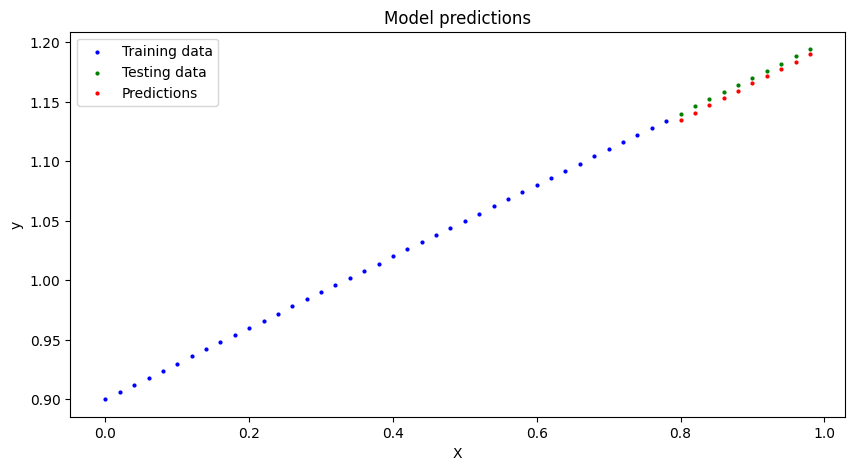

In [27]:
training_testing_loop(epochs=300, model=model_1, loss_fn=loss_fn, optimizer=optimizer, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

In [31]:
# save model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to the {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Saving model to the models/01_pytorch_workflow_model_1.pth


In [32]:
# load model

loaded_model = LinearRegressionModelV1()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model.to(device)

LinearRegressionModelV1()

In [34]:
y_preds_new = loaded_model(X_test)

y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

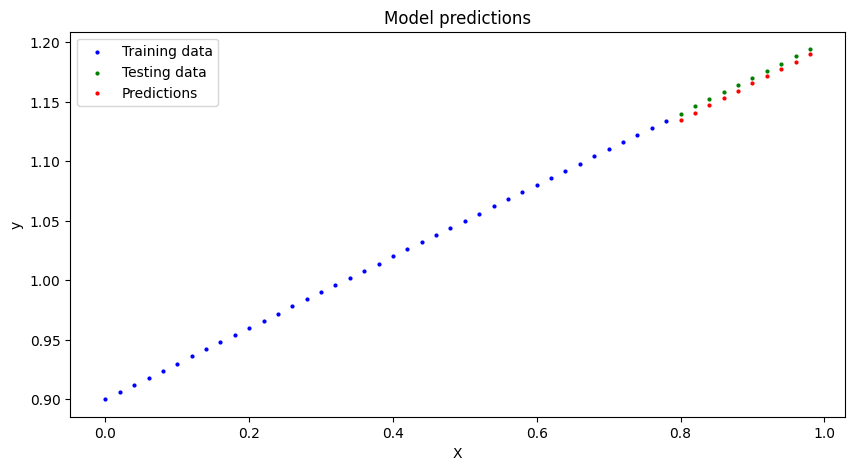

In [35]:
loaded_model.eval()
with torch.inference_mode():
  y_preds_new = loaded_model(X_test)

plot_predictions(predictions=y_preds_new)

In [36]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.3055])), ('bias', tensor([0.8903]))])